In [35]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams['font.family'] = ['Heiti TC']

In [3]:
ap01 = pd.read_excel("ap01.xlsx")


In [4]:
ap02 = pd.read_excel("ap02.xlsx")
#1m22.1s to read.
# ['销售日期', '扫码销售时间', '单品编码', '销量(千克)', '销售单价(元/千克)', '销售类型', '是否打折销售']

In [51]:
danpin_bianma_list = ap01["单品编码"].tolist()
uid_to_name = pd.Series(ap01["单品名称"].values, index=ap01["单品编码"]).to_dict()
name_to_uid = {v: k for k, v in uid_to_name.items()}

In [11]:
ap02[ap02["单品编码"]==danpin_bianma_list[0]]

,销售日期,扫码销售时间,单品编码,销量(千克),销售单价(元/千克),销售类型,是否打折销售
128159,2020-10-30,10:02:13.748,102900005115168,0.743,5.0,销售,否
128248,2020-10-30,10:48:42.707,102900005115168,0.502,5.0,销售,否
128272,2020-10-30,11:10:13.023,102900005115168,0.301,5.0,销售,否
128342,2020-10-30,12:34:32.084,102900005115168,0.382,5.0,销售,否
128376,2020-10-30,13:33:59.748,102900005115168,0.261,5.0,销售,否
...,...,...,...,...,...,...,...
859803,2023-05-30,11:38:51.277,102900005115168,0.270,3.0,销售,否
859823,2023-05-30,12:20:26.916,102900005115168,0.405,3.0,销售,否
859863,2023-05-30,14:23:49.201,102900005115168,0.135,3.0,销售,否
859911,2023-05-30,15:52:00.17,102900005115168,0.203,3.0,销售,否


In [48]:
pd.to_timedelta(ap02[ap02["单品编码"]==danpin_bianma_list[0]]["扫码销售时间"]).dt.total_seconds().to_numpy() - 8.5*60*60

array([ 5533.748,  8322.707,  9613.023, ..., 21229.201, 26520.17 ,
       37253.148])

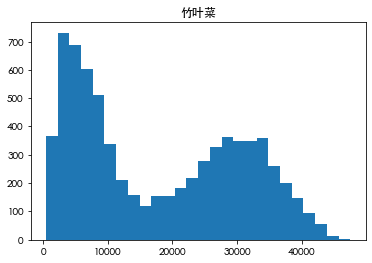

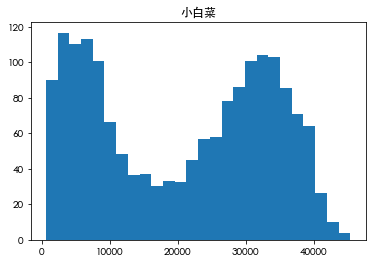

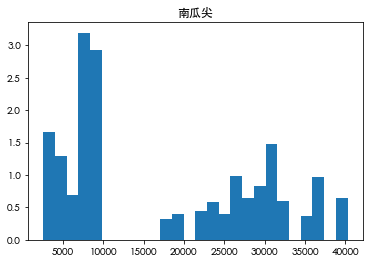

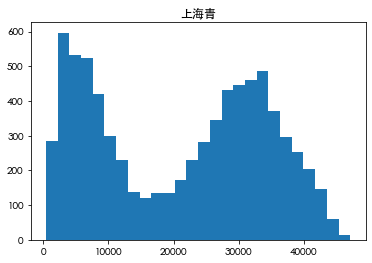

In [53]:
for i, dpbm in enumerate(danpin_bianma_list):
    if i <= 5 or i >= 10: continue
    plt.cla()
    plt.title(uid_to_name[dpbm])
    filtered_df = ap02[ap02["单品编码"]==dpbm]
    plt.hist(pd.to_timedelta(filtered_df["扫码销售时间"]).dt.total_seconds().to_numpy()-9*3600, 
             weights=filtered_df["销量(千克)"].to_numpy(),
             bins=26)
    plt.show()